In [1]:
from am4pa.linnea import LinneaConfig, MeasurementsLinnea
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
from pm4py.visualization.footprints import visualizer as fp_visualizer

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/visualization/footprints/__init__.py:21: UserWarning: The footprints visualizer will be removed in a future release.
  warnings.warn("The footprints visualizer will be removed in a future release.")


In [5]:
linnea_config = LinneaConfig("MatrixChain4",4)
linnea_config.set_local_directory("../linnea/matrix-chain-4/")
linnea_config.setup_backend_details(server="login18-1.hpc.itc.rwth-aachen.de",
                                   uname = "as641651",
                                   init_script="~/.analyzer",
                                   backend_dir="~/PhD/va4algs-exps/matrix-chain-4/")

In [6]:
linnea_config.connect_backend()

In [7]:
linnea_config.check_backend_folder_sync()

True

In [8]:
op_sizes = ["1000","1000","10","1000","1000"]
ms = MeasurementsLinnea(linnea_config,op_sizes)

In [9]:
ms.generate_variants(bGenerate=False)

In [10]:
dc = ms.data_collector

In [12]:
log = dc.get_meta_table()
log

,case:concept:name,concept:name,concept:flops,concept:kernel,concept:operation,timestamp:start
0,algorithm0,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml4)",tmp3 = (C D),2022-12-20 15:53:12.869753
1,algorithm0,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml5)",tmp1 = (A B),2022-12-20 15:53:13.869753
2,algorithm0,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml5, ml4, 0.0, ml6)",tmp6 = (tmp1 tmp3),2022-12-20 15:53:14.869753
3,algorithm2,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",tmp1 = (A B),2022-12-20 15:56:32.869753
4,algorithm2,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml4, ml2, 0.0, ml5)",tmp4 = (tmp1 C),2022-12-20 15:56:33.869753
5,algorithm2,gemm_2e+09,2.000000e+09,"gemm!('N', 'N', 1.0, ml5, ml3, 0.0, ml6)",tmp6 = (tmp4 D),2022-12-20 15:56:34.869753
6,algorithm4,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml1, ml2, 0.0, ml4)",tmp2 = (B C),2022-12-20 15:59:52.869753
7,algorithm4,gemm_2e+09,2.000000e+09,"gemm!('N', 'N', 1.0, ml4, ml3, 0.0, ml5)",tmp5 = (tmp2 D),2022-12-20 15:59:53.869753
8,algorithm4,gemm_2e+09,2.000000e+09,"gemm!('N', 'N', 1.0, ml0, ml5, 0.0, ml6)",tmp6 = (A tmp5),2022-12-20 15:59:54.869753
9,algorithm1,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",tmp1 = (A B),2022-12-20 15:54:52.869753


In [19]:
xes_log = log_converter.apply(log)

In [20]:
activities = pm4py.get_event_attribute_values(xes_log, "concept:name")
activities

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


{'gemm_2e+07': 12, 'gemm_2e+09': 6}

In [26]:
net, im, fm = pm4py.discover_petri_net_inductive(xes_log)

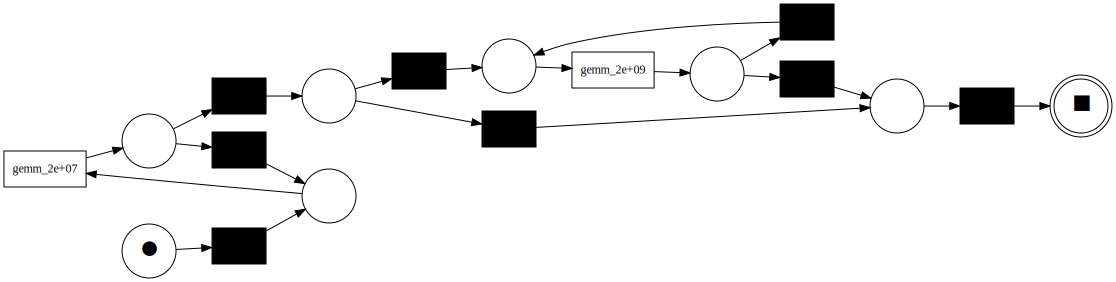

In [27]:
pn_visualizer.apply(net,im,fm)

In [28]:
tree = pm4py.discover_process_tree_inductive(xes_log)

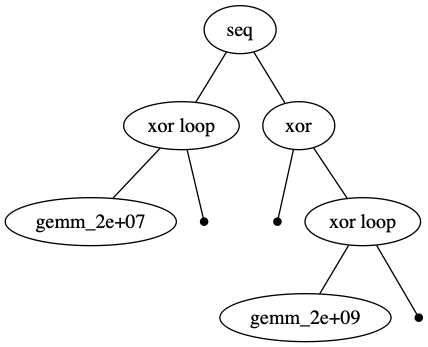

In [29]:
pm4py.view_process_tree(tree)

In [32]:
dfg, st, en = pm4py.discover_dfg(xes_log)

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_56497/2778094008.py:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, st, en = pm4py.discover_dfg(xes_log)


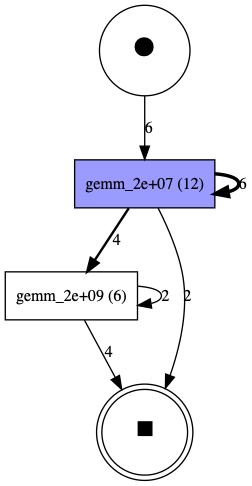

In [33]:
 pm4py.view_dfg(dfg, st, en)

In [39]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer
gviz = dfg_visualizer.apply(dfg)

In [41]:
print(gviz)

digraph {
	graph [bgcolor=white]
	node [shape=box]
	-6655237382206230595 [label="gemm_2e+07 (6)" fillcolor="#FFFFFF" fontsize=12 style=filled]
	-6626188385558876383 [label="gemm_2e+09 (6)" fillcolor="#FFFFFF" fontsize=12 style=filled]
	-6655237382206230595 -> -6655237382206230595 [label=6 fontsize=12 penwidth=2.59999600001]
	-6655237382206230595 -> -6626188385558876383 [label=4 fontsize=12 penwidth=1.799998000005]
	-6626188385558876383 -> -6626188385558876383 [label=2 fontsize=12 penwidth=1.0]
	overlap=false
}



In [43]:
 fp = footprints_discovery.apply(xes_log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)

In [44]:
fp

{'dfg': Counter({('gemm_2e+07', 'gemm_2e+07'): 6,
          ('gemm_2e+07', 'gemm_2e+09'): 4,
          ('gemm_2e+09', 'gemm_2e+09'): 2}),
 'sequence': {('gemm_2e+07', 'gemm_2e+09')},
 'parallel': {('gemm_2e+07', 'gemm_2e+07'), ('gemm_2e+09', 'gemm_2e+09')},
 'start_activities': {'gemm_2e+07'},
 'end_activities': {'gemm_2e+07', 'gemm_2e+09'},
 'activities': {'gemm_2e+07', 'gemm_2e+09'},
 'min_trace_length': 3}

In [49]:
gviz = fp_visualizer.apply(fp)

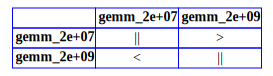

In [51]:
gviz

In [82]:
for k,v in fp['dfg'].items():
    print(k,v)

('gemm_2e+07', 'gemm_2e+07') 6
('gemm_2e+07', 'gemm_2e+09') 4
('gemm_2e+09', 'gemm_2e+09') 2


In [83]:
fp['dfg'][('gemm_2e+07', 'gemm_2e+07')]

6